# Introduction
In my project i will work with online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. I will try identify patterns that determine whether a game succeeds or not.
We will prioritize a list of hypotheses that may help boost revenue.
We will analyze  an A/B test and check the the results.

In [1]:
import pandas as pd# Loading all the libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
pd.set_option('max_colwidth', 150)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [4]:
visits = pd.read_csv('/datasets/visits_us.csv')
visits['date']=pd.to_datetime(visits['date'],format='%Y-%m-%d') 
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [6]:
visits.duplicated().sum()

0

In [7]:
visits['group'].unique()

array(['A', 'B'], dtype=object)

In [8]:
orders=pd.read_csv('/datasets/orders_us.csv')
orders['date']=pd.to_datetime(orders['date'],format='%Y-%m-%d') 
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [10]:
ordersAggregated = (orders.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                           .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 
                                 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))
                   

In [11]:
orders['date'] = orders['date'].astype('datetime64[D]')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [12]:
visits['date'] = visits['date'].astype('datetime64[D]')
visits['date'] = visits['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
print(visits['date'].max())
print(visits['date'].min())

2019-08-31 00:00:00
2019-08-01 00:00:00


In [14]:
print(orders['date'].max())
print(orders['date'].min())

2019-08-31 00:00:00
2019-08-01 00:00:00


In both datasets the same period of time.

In [15]:
usersA=orders[orders['group']=='A']
usersA

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...
1187,2274188238,132143192,2019-08-14,15.5,A
1188,1692103379,1022829655,2019-08-14,5.7,A
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [16]:
usersB=orders[orders['group']=='B']
usersB

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1189,4082620617,393266494,2019-08-14,490.4,B
1190,38478481,1197745035,2019-08-14,135.3,B
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B


In [17]:
usersA=usersA[usersA['visitorId'].isin(usersB['visitorId'])]
usersA

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
26,2223239646,199603092,2019-08-15,55.7,A
29,2220299125,3803269165,2019-08-15,15.8,A
33,486237576,2378935119,2019-08-15,30.4,A
41,2594268419,237748145,2019-08-15,20.8,A
...,...,...,...,...,...
1167,3757656646,4186807279,2019-08-14,80.8,A
1173,3612788481,2712142231,2019-08-14,40.3,A
1178,4052155355,2949041841,2019-08-14,5.9,A
1183,1458356232,963407295,2019-08-14,80.0,A


In [18]:
doubleA=usersA['visitorId']
doubleA

2       4069496402
26       199603092
29      3803269165
33      2378935119
41       237748145
           ...    
1167    4186807279
1173    2712142231
1178    2949041841
1183     963407295
1195    1614305549
Name: visitorId, Length: 89, dtype: int64

In [19]:
usersB=usersB[usersB['visitorId'].isin(usersA['visitorId'])]
usersB

,transactionId,visitorId,date,revenue,group
20,2904772834,963407295,2019-08-15,5.6,B
23,4252514150,351125977,2019-08-15,235.6,B
24,1162046357,3234906277,2019-08-15,120.2,B
27,1630050528,237748145,2019-08-15,120.2,B
32,3666913472,2038680547,2019-08-15,30.8,B
...,...,...,...,...,...
1172,3898641900,3803269165,2019-08-14,15.2,B
1175,1373388206,3717692402,2019-08-14,40.9,B
1182,2682156369,1668030113,2019-08-14,20.8,B
1184,1329499668,2949041841,2019-08-14,160.7,B


In [20]:
doubleB=usersB['visitorId']
doubleB

20       963407295
23       351125977
24      3234906277
27       237748145
32      2038680547
           ...    
1172    3803269165
1175    3717692402
1182    1668030113
1184    2949041841
1189     393266494
Name: visitorId, Length: 92, dtype: int64

In [21]:
orders[orders['visitorId']==4069496402]#check Id from usersA

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
1070,1473132782,4069496402,2019-08-12,10.8,B


In [22]:
orders[orders['visitorId']==963407295]#check Id from usersB

,transactionId,visitorId,date,revenue,group
20,2904772834,963407295,2019-08-15,5.6,B
1183,1458356232,963407295,2019-08-14,80.0,A


In [23]:
orders=orders[orders['visitorId'].isin(doubleB)==False]
orders=orders[orders['visitorId'].isin(doubleA)==False]


In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


check if our date is clean. Without users in both group.

In [25]:
len_of_data=len(orders)#len of table orders 
len_double_valA= len(doubleA)#users from double A
len_double_valB= len(doubleB)#users from double B
Len_of_double_data=len_double_valA+len_double_valB#all double users data
Len_of_double_data

181

In [26]:
len_of_clean_data=len_of_data-Len_of_double_data
len_of_clean_data

835

Yes we can see in orders.info() that len_of_clean_data is the same with len of orders.

In [27]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [28]:
hypotheses['ICE'] = (hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']


In [29]:
display(hypotheses[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [30]:
# Reviewer's code

display(hypotheses[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).head(3))

hypotheses[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).tail(3)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000


,Hypothesis,ICE
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [31]:

hypotheses['RICE'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']


In [32]:
display(hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


According to the ICE, hypotheses 8,0,7 had the highest scores. 
After applying the RICE, the priorities changed to hypotheses 7,2,0. 
This is because in the case of the ICE,we did not take the scope of changes, 
while this is an important component of the assessment of hypotheses.
So we will take 7,2,0.

## Graph cumulative revenue by group. 

In [33]:
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis = 1)
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

In [34]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(x['date'] >= visits['date'], x['group']==visits['group'])]\
.agg({'date':'max', 'group':'max', 'visits':'sum'}), axis = 1)
cummulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.head(5)

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [35]:
groupA=cummulativeData[cummulativeData['group']=='A']
groupA.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
2,2019-08-02,A,42,36,3734.9,1338
4,2019-08-03,A,66,60,5550.1,1845
6,2019-08-04,A,77,71,6225.6,2562
8,2019-08-05,A,99,92,7623.6,3318


In [36]:
groupA['cumul_rev']=groupA['revenue'].cumsum()
groupA.head()

,date,group,orders,buyers,revenue,visits,cumul_rev
0,2019-08-01,A,23,19,2266.6,719,2266.6
2,2019-08-02,A,42,36,3734.9,1338,6001.5
4,2019-08-03,A,66,60,5550.1,1845,11551.6
6,2019-08-04,A,77,71,6225.6,2562,17777.2
8,2019-08-05,A,99,92,7623.6,3318,25400.8


In [37]:
groupA=groupA[groupA['group']=='A']
groupA['group'].nunique()

1

In [38]:
groupB=cummulativeData[cummulativeData['group']=='B']
groupB.head()

,date,group,orders,buyers,revenue,visits
1,2019-08-01,B,17,17,967.2,713
3,2019-08-02,B,40,39,3535.3,1294
5,2019-08-03,B,54,53,4606.9,1803
7,2019-08-04,B,68,66,6138.5,2573
9,2019-08-05,B,89,87,7587.8,3280


In [39]:
groupB=groupB[groupB['group']=='B']
groupB['group'].nunique()

1

In [40]:
groupB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 61
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     31 non-null     datetime64[ns]
 1   group    31 non-null     object        
 2   orders   31 non-null     int64         
 3   buyers   31 non-null     int64         
 4   revenue  31 non-null     float64       
 5   visits   31 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [41]:
groupB['cumul_rev']=groupB['revenue'].cumsum()
groupB.head()

,date,group,orders,buyers,revenue,visits,cumul_rev
1,2019-08-01,B,17,17,967.2,713,967.2
3,2019-08-02,B,40,39,3535.3,1294,4502.5
5,2019-08-03,B,54,53,4606.9,1803,9109.4
7,2019-08-04,B,68,66,6138.5,2573,15247.9
9,2019-08-05,B,89,87,7587.8,3280,22835.7


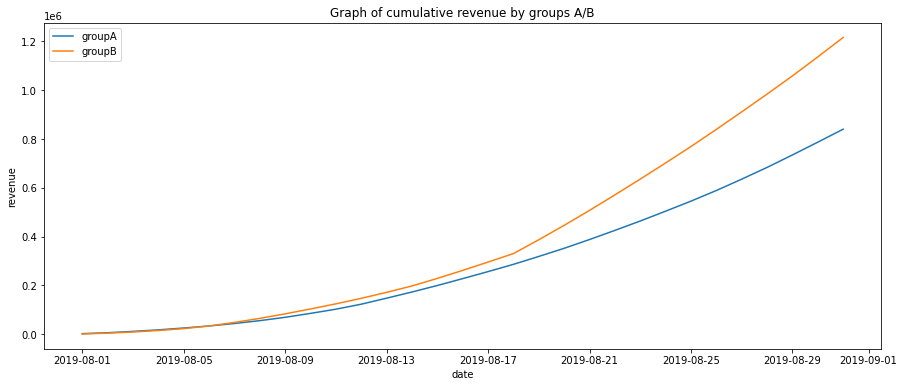

In [42]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(groupA['date'], groupA['cumul_rev'], label='groupA')
plt.plot(groupB['date'], groupB['cumul_rev'], label='groupB')
plt.ylabel('revenue')
plt.xlabel('date')
plt.title('Graph of cumulative revenue by groups A/B')
plt.legend();

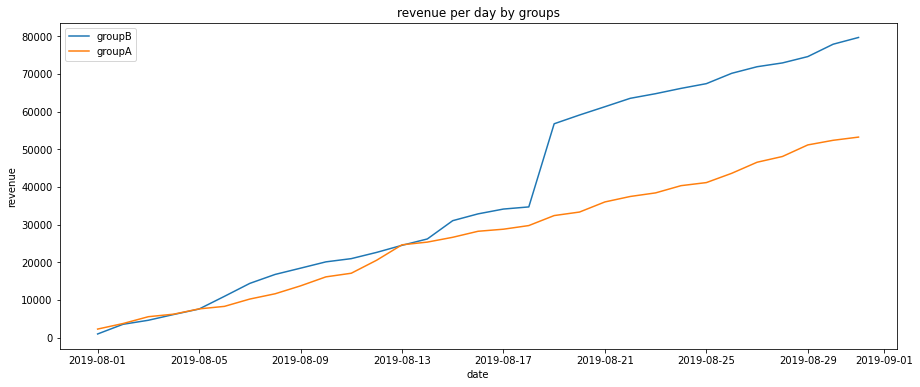

In [43]:
#general revenue per day 
plt.plot(groupB['date'], groupB['revenue'], label='groupB')
plt.plot(groupA['date'], groupA['revenue'], label='groupA')
plt.title('revenue per day by groups')
plt.xlabel('date')
plt.ylabel('revenue')
plt.legend();

As we see group B shows the best revenue then group A. After 2019/08/13 we have increase jump in group B.

## Plotting the cumulative average check by group and the relative change

In [44]:
groupB['cumul_purch']=groupB['orders'].cumsum()
groupB['cumul_avch']=groupB['cumul_rev']/groupB['cumul_purch']
groupB.head()

,date,group,orders,buyers,revenue,visits,cumul_rev,cumul_purch,cumul_avch
1,2019-08-01,B,17,17,967.2,713,967.2,17,56.894118
3,2019-08-02,B,40,39,3535.3,1294,4502.5,57,78.991228
5,2019-08-03,B,54,53,4606.9,1803,9109.4,111,82.066667
7,2019-08-04,B,68,66,6138.5,2573,15247.9,179,85.183799
9,2019-08-05,B,89,87,7587.8,3280,22835.7,268,85.207836


In [45]:
groupA['cumul_purch']=groupA['orders'].cumsum()
groupA['cumul_avch']=groupA['cumul_rev']/groupA['cumul_purch']
groupA.head()

,date,group,orders,buyers,revenue,visits,cumul_rev,cumul_purch,cumul_avch
0,2019-08-01,A,23,19,2266.6,719,2266.6,23,98.547826
2,2019-08-02,A,42,36,3734.9,1338,6001.5,65,92.330769
4,2019-08-03,A,66,60,5550.1,1845,11551.6,131,88.180153
6,2019-08-04,A,77,71,6225.6,2562,17777.2,208,85.467308
8,2019-08-05,A,99,92,7623.6,3318,25400.8,307,82.738762


In [46]:
groupA['avch']=groupA['revenue']/groupA['orders']
groupB['avch']=groupB['revenue']/groupB['orders']


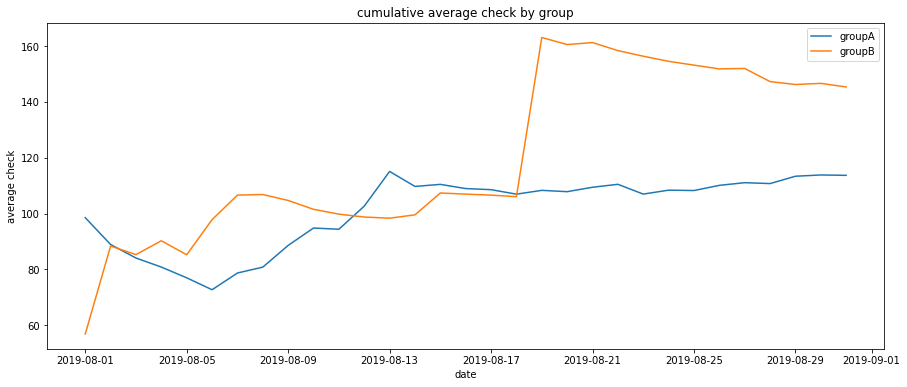

In [47]:
plt.plot(groupA['date'], groupA['avch'], label='groupA')
plt.plot(groupB['date'], groupB['avch'], label='groupB')
plt.title('cumulative average check by group')
plt.xlabel('date')
plt.ylabel('average check')
plt.legend();

as we can see, the average check of group b was higher than that of group a most of the time it increased sharply after 2019/08/17

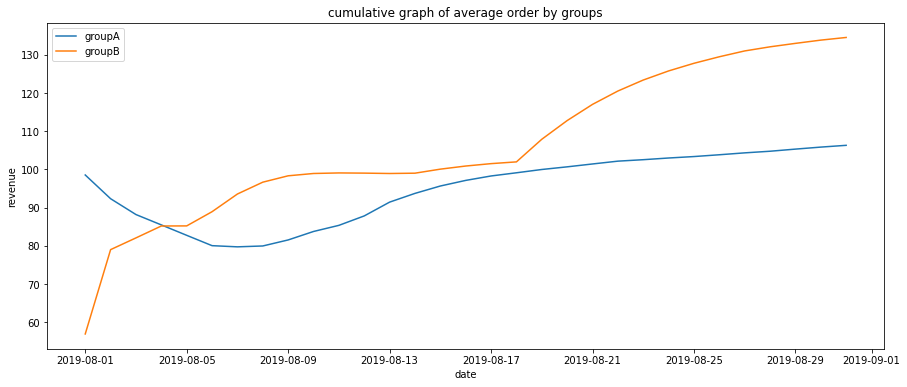

In [48]:
plt.plot(groupA['date'], groupA['cumul_avch'], label='groupA')
plt.plot(groupB['date'], groupB['cumul_avch'], label='groupB')
plt.title('cumulative graph of average order by groups')
plt.xlabel('date')
plt.ylabel('revenue')
plt.legend();

In [49]:
cum_revenue = (groupA[['date', 'cumul_avch']].merge(groupB[['date', 'cumul_avch']], 
                                            left_on='date', right_on='date', how='left', suffixes=['A', 'B']))
cum_revenue.head()

,date,cumul_avchA,cumul_avchB
0,2019-08-01,98.547826,56.894118
1,2019-08-02,92.330769,78.991228
2,2019-08-03,88.180153,82.066667
3,2019-08-04,85.467308,85.183799
4,2019-08-05,82.738762,85.207836


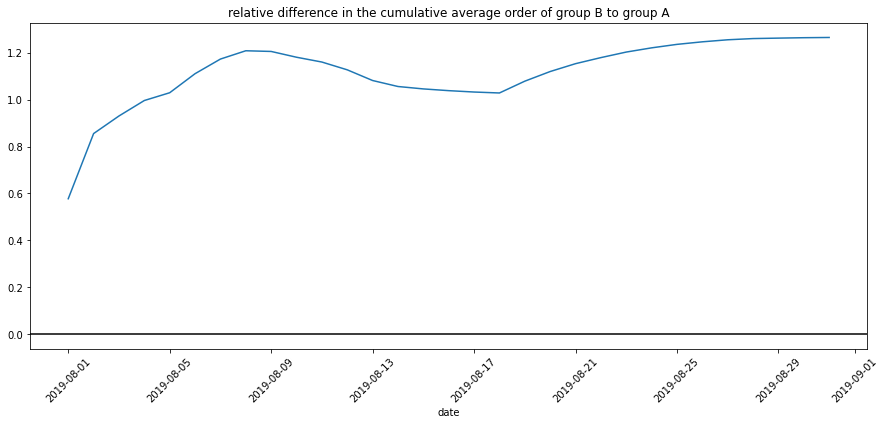

In [50]:

plt.plot(cum_revenue['date'], cum_revenue['cumul_avchB'] / cum_revenue['cumul_avchA'])
plt.title('relative difference in the cumulative average order of group B to group A')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.show();

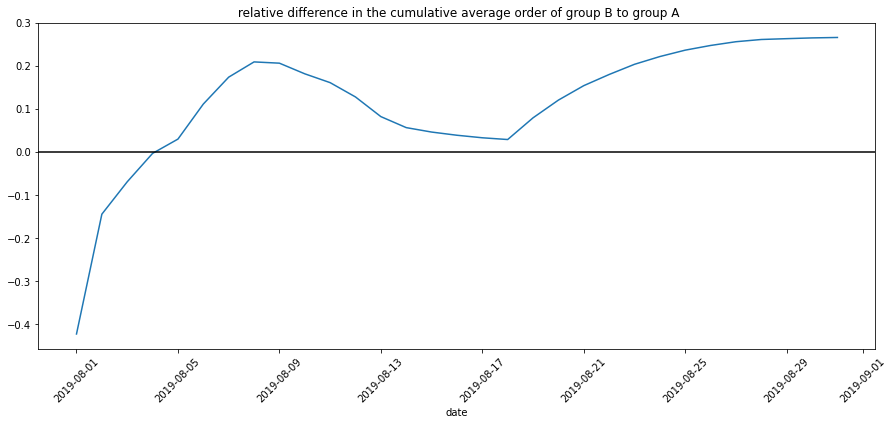

In [51]:
plt.plot(cum_revenue['date'], (cum_revenue['cumul_avchB'] -cum_revenue['cumul_avchA'])/cum_revenue['cumul_avchA'])
plt.title(' relative difference in the cumulative average order of group B to group A')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.show();

We can see that on the first graph the line is mostly above 1, which means that the group B is better. The second graph with another formula shows the same ratio. Also on the cumulative graph of average order by groups we already can see the same picture according to the behavior of the lines.

## Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference

In [53]:
groupB.head()

,date,group,orders,buyers,revenue,visits,cumul_rev,cumul_purch,cumul_avch,avch
1,2019-08-01,B,17,17,967.2,713,967.2,17,56.894118,56.894118
3,2019-08-02,B,40,39,3535.3,1294,4502.5,57,78.991228,88.382500
5,2019-08-03,B,54,53,4606.9,1803,9109.4,111,82.066667,85.312963
7,2019-08-04,B,68,66,6138.5,2573,15247.9,179,85.183799,90.272059
9,2019-08-05,B,89,87,7587.8,3280,22835.7,268,85.207836,85.256180


In [54]:
groupA['conversion']=groupA['orders']/groupA['visits']
groupB['conversion']=groupB['orders']/groupB['visits']

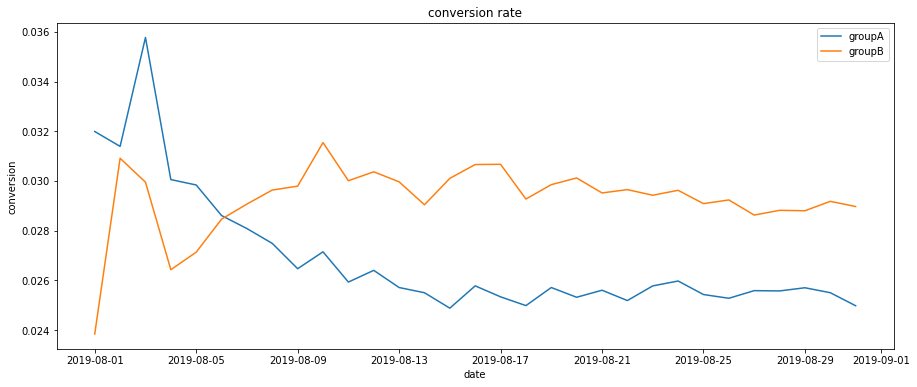

In [55]:
plt.plot(groupA['date'], groupA['conversion'], label='groupA')
plt.plot(groupB['date'], groupB['conversion'], label='groupB')
plt.title('conversion rate')
plt.xlabel('date')
plt.ylabel('conversion')
plt.legend();

Both groups have a peak in the same period, after which both groups experience a sharp decline.
Group A has a more serious decline, while group B looks better,as they then return to the top.

In [56]:
#groupB shows better conversion than groupA

In [57]:
#overall conversion A:
groupA['buyers'].sum()/groupA['visits'].sum()

0.024434608225129467

In [58]:
##overall conversion B:

groupB['buyers'].sum()/groupB['visits'].sum()

0.028597293319265887

In [59]:
#Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
orders_per_user = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
orders_per_user.columns = ['visitorId', 'orders']
orders_per_user.head(5)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


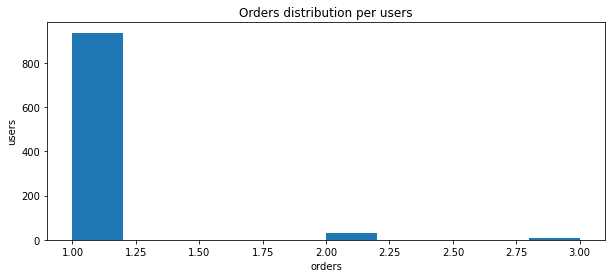

In [60]:
plt.figure(figsize=(10,4))
plt.hist(orders_per_user['orders'], bins = 10)
plt.title('Orders distribution per users')
plt.xlabel('orders')
plt.ylabel('users')
plt.show()

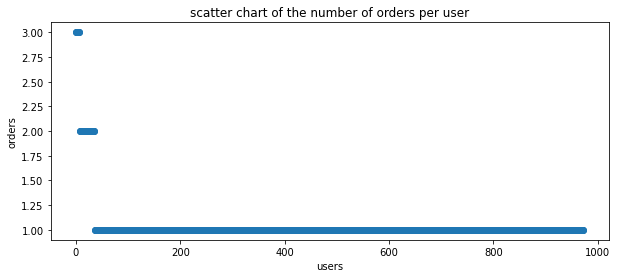

In [61]:
x_values = pd.Series(range(0, len(orders_per_user)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders_per_user['orders'])
plt.title('scatter chart of the number of orders per user')
plt.xlabel('users')
plt.ylabel('orders')
plt.show()

judging by the charts, most of users make one order

# Calculate the 95th and 99th percentiles for the number of orders per user. 
# Define the point at which a data point becomes an anomaly.

In [62]:

percentiles = np.percentile(orders_per_user['orders'], [95, 99])
print(percentiles[0])
print(percentiles[1])

1.0
2.0


only 1% makes 2 or more orders.

In [63]:
orders['revenue'].max()

19920.4

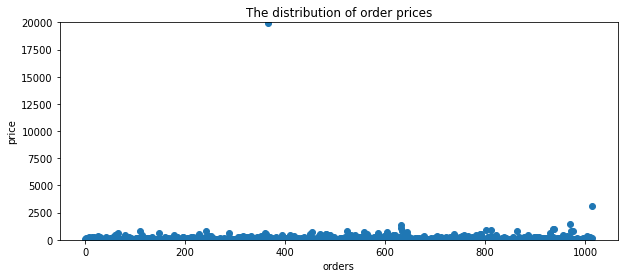

In [64]:
#Plot a scatter chart of order prices. Make conclusions and conjectures.
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('The distribution of order prices')
plt.ylim([0,20000])
plt.xlabel('orders')
plt.ylabel('price')
plt.show()

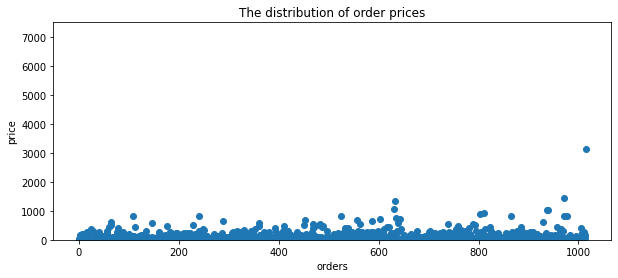

In [65]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('The distribution of order prices')
plt.ylim([0,7500])
plt.xlabel('orders')
plt.ylabel('price')
plt.show()

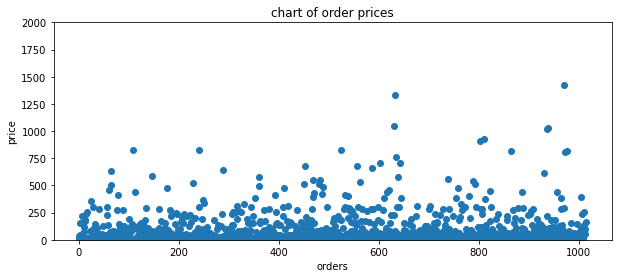

In [66]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'])
plt.title('chart of order prices')
plt.ylim([0,2000])
plt.xlabel('orders')
plt.ylabel('price')
plt.show()

So we can say that we have anomaly data and outliers everything above 1000/ 1250.

# Calculate the 95th and 99th percentiles of order prices. 


In [67]:
#Calculate the 95th and 99th percentiles of order prices. 
percentiles = np.percentile(orders['revenue'], [95, 99])
print(percentiles[0])
print(percentiles[1])

414.275
830.3


most people order up to 414.275 and only one is over 830.

# Find the statistical significance of the difference in conversion between the groups using the raw data.



In [68]:
import math
from scipy import stats

In [69]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersA

,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
...,...,...
440,4227830084,1
441,4237561104,1
442,4243832526,1
443,4259830713,1


In [70]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']
ordersByUsersB

,visitorId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
...,...,...
523,4251115836,1
524,4258103007,1
525,4279090005,1
526,4281247801,1


In [71]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [72]:
list_1 =[]
for i in range(0,(visits[visits['group']=='A']['visits'].sum()-len(ordersByUsersA))):
    list_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_1, name = 'orders')

list_2 =[]
for i in range(0,(visits[visits['group']=='B']['visits'].sum()-len(ordersByUsersB))):
    list_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)
print('\nRelative increase in conversion of group B in relation to group A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('According to the raw data in the conversion of groups A and B, the difference is statistically significant')
else:
    print('According to the raw data, there is no difference  in the conversion of groups A and B!')


Relative increase in conversion of group B in relation to group A: 0.160
P-value: 0.011018084110014696
According to the raw data in the conversion of groups A and B, the difference is statistically significant


In [73]:

pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18291, dtype: int64

# Find the statistical significance of the difference in conversion between the groups using the filtered data. 


In [74]:
limit_orders = 2
limit_revenue = 830

In [75]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>limit_orders]['visitorId'], 
                                ordersByUsersB[ordersByUsersB['orders']>limit_orders]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitorId']
outliers= pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(len(outliers))#number of not our users

19


In [76]:
Filtered_A = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(outliers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
Filtered_B= pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(outliers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)
print(Filtered_B.mean()/Filtered_A.mean()-1)
results = stats.mannwhitneyu(Filtered_A, Filtered_B)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('According to the clean data in the conversion of groups A and B, the difference is statistically significant')
else:
    print('According to the clean data, there is no difference  in the conversion of groups A and B!')

0.19225594759133124
P-value: 0.00628825819911193
According to the clean data in the conversion of groups A and B, the difference is statistically significant


# Find the statistical significance of the difference in average order size between the groups using the filtered data. 

In [77]:
print('statistical significance of the difference in average order size between the groups using the filtered data: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(outliers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(outliers)))]['revenue'].mean()-1))
       
       

statistical significance of the difference in average order size between the groups using the filtered data: -0.014


In [78]:
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(outliers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(outliers)))]['revenue'])
alpha = 0.05

print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('According to the clean data, the difference in average checks in groups A and B is statistically significant')
else:
    print('According to the clean data, there is no difference in average checks in groups A and B')

P-value: 0.8767101122551697
According to the clean data, there is no difference in average checks in groups A and B


# Avereage daily conversion

H0: Average check A does not exceed the average check of group B

H1: Average ticket A exceeds the average check of group B

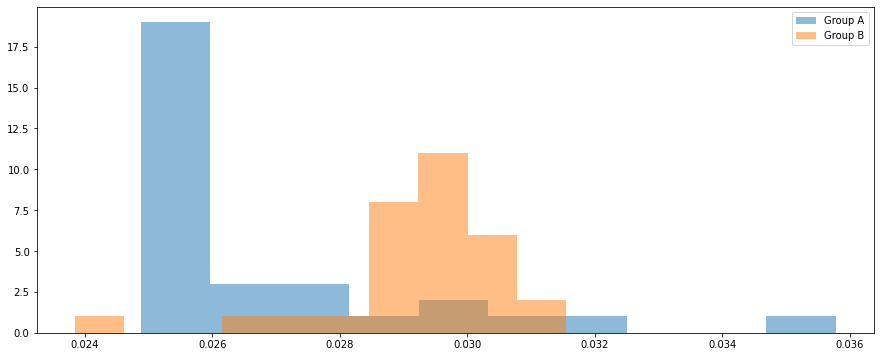

In [79]:
import random
import numpy
from matplotlib import pyplot


pyplot.hist(groupA['conversion'], alpha=0.5, label='Group A')
pyplot.hist(groupB['conversion'], alpha=0.5, label='Group B')
pyplot.legend(loc='upper right')
pyplot.show()

In [80]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')
    

# Testing average check

In [81]:
groupA['avg_ch']=groupA['revenue']/groupA['orders']
groupB['avg_ch']=groupB['revenue']/groupB['orders']

In [82]:
groupA['avg_ch'].mean()

101.11552841801576

In [83]:
groupB['avg_ch'].mean()

120.76430013945237

In [84]:
testing_average(groupA['avg_ch'],groupB['avg_ch'],alpha=0.05)

0.16338441712343454
Fail to Reject H0


# Statistical significance of the difference in average order size between the groups on raw data

We will use the Mann-Whitney test.

H0: Average check A does not exceed the average check of group B

H1: Average ticket A exceeds the average ticket of group B

In [85]:
print( orders[orders['group']=='A']['revenue'].mean())
print( orders[orders['group']=='B']['revenue'].mean())

113.70085470085469
145.34890510948907


In [86]:
from scipy import stats as st
alpha = 0.05

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue

print('pvalue :', pvalue)

if (pvalue < alpha):
    print('Reject H0: we can say that the difference in average checks on raw data in groups A and B is statistically significant')
else:
    print('Fail to Reject H0: there is no difference in average checks in groups A and B')

pvalue : 0.8622329690015668
Fail to Reject H0: there is no difference in average checks in groups A and B


In raw data group B has average order more then group A, but after test we can see that difference is not  statistically significant

we see that group B is the leader in all cumulative metrics. 
Before and after data cleansing,  conversion rate of group B is higher than group A 
difference in conversion rates between groups and before and after data cleansing is statistically significant,
which allows us to conclude that we can stop our A / B test and say that group B is leader!

# Conclusion
1) In the beggining we explored data orders and visits tables and  brought it to the right kind
2) we prioritized hypotheses using methods ICE and RICE
3) we have built cumulative graphs for each of the groups
4) Calculated the 95th and 99th percentiles for the number of orders per user. Only 1% of users made more then 2 orders
5) Calculated the 95th and 99th percentiles of order prices. 95 % it's before 414.275 and only 1% is up then 830.3
6) GroupB shows better conversion than groupA
7) We tested raw and clear data in both of them  conversion of groups A and B, the difference is statistically significant
8) ALso we checked average checks in groups A and B. According to the clean data, there is no difference in average checks in groups A and B
throughout our test, we see that group B is in the lead, which allows us to conclude that we can stop our A / B test and say that group B is leader!